In [189]:
import shapefile
import datetime

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

%matplotlib inline
# plt.rcParams['figure.figsize'] = [10, 10]

In [165]:
TREE_TYPE_FIELD = "GENUS"
N_TREE_TYPES = 5

Point data from downloaded from http://data-seattlecitygis.opendata.arcgis.com/datasets/trees?geometry=-122.382%2C47.640%2C-122.330%2C47.650

In [3]:
sf  = shapefile.Reader("./raw-tree-data-2020/Trees")
records = sf.records()

In [6]:
print(records[0].as_dict().items())

dict_items([('OBJECTID', 2001), ('COMPKEY', 204707), ('UNITID', 'TRE-36995'), ('UNITDESC', '1101 E LYNN ST'), ('CONDITION', ''), ('CONDITION_', ''), ('CURRENT_ST', 'INSVC'), ('PRIMARYDIS', 'DISTRICT3'), ('SECONDARYD', ''), ('OVERRIDEYN', 'N'), ('COMPTYPE', 36), ('SEGKEY', 14315), ('UNITTYPE', 'TRE'), ('OWNERSHIP', 'PRIV'), ('CURRENT__1', ''), ('LAST_VERIF', ''), ('PLANTED_DA', '1991-07-24T00:00:00.000Z'), ('BOTANICAL_', 'STJA'), ('SCIENTIFIC', 'Styrax japonicus'), ('HERITAGE', 'N'), ('EXCEPTIONA', 'N'), ('CODEREQ', 'N'), ('GSI', 'N'), ('GREEN_FACT', 'N'), ('WIRES', 'N'), ('CABLED', 'N'), ('CLEARANCE_', 'N'), ('SPACETYPE', 'GRASS'), ('SITETYPE', ''), ('GROWSPACE', 6), ('DIAM', 2), ('CONDITIO_1', '5'), ('FUNDING_SO', 'PVT'), ('WATER_THRO', 0), ('WATER_TH_1', 0), ('WATER_TH_2', 0), ('OWNERDIAM', 'PRIV1'), ('EXPDATE', ''), ('COMMON_NAM', 'Japanese Snowbell Tree'), ('TREEHEIGHT', 0), ('ASBUILTPLA', ''), ('LANDSCAPEA', 1), ('COMMENTS', 'TrunkLean=0, Topped=0, BrnDefect=0, TrnDefect=0, RootPr

In [202]:
def plot_stats(xkey, ykey, xlabel="", ylabel="", xfunc=lambda x: x, yfunc=lambda y: y, save_file="default"
               , tree_type="", point_size=1, plot_line=False, title=''):
    save_file = f"plots/{xkey}-{ykey}.png" if save_file == "default" else save_file

    if(title): plt.suptitle(title, fontsize=20)
    plt.xlabel(xkey if not xlabel else xlabel)
    plt.ylabel(ykey if not ylabel else ylabel)
    
    check_valid_data = lambda n, m: n and m and n > -1 and m > -1
    check_tree = lambda i: (not tree_type) or i[TREE_TYPE_FIELD] == tree_type
    x, y = zip(*[(xfunc(i[xkey]), yfunc(i[ykey])) for i in records 
                 if check_tree(i) and check_valid_data(xfunc(i[xkey]), yfunc(i[ykey]))])
    x, y = np.array(x), np.array(y)
    
    if plot_line:
        b, m = polyfit(x, y, 1)
        print(f'Gradient: {m}')
        plt.plot(x, b + m * x, '-', color='black')
    
    plt.scatter(x, y, point_size)
    if save_file: plt.savefig(save_file)
    plt.show()

In [62]:
def date_to_year(date):
    return datetime.datetime.now().year - int(date[:4]) if date else -1

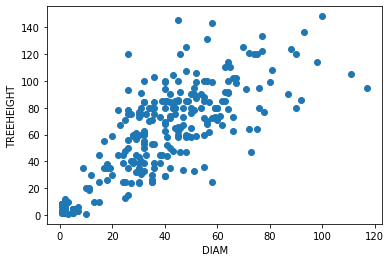

In [47]:
plot_stats("DIAM", "TREEHEIGHT")

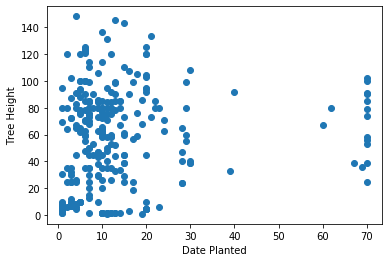

In [61]:
plot_stats("PLANTED_DA", "TREEHEIGHT", xlabel="Date Planted", ylabel="Tree Height", xfunc=date_to_year)

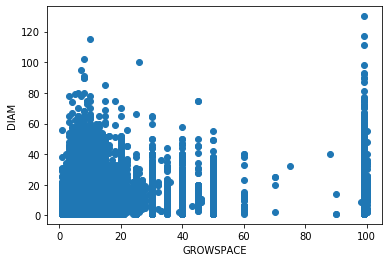

In [49]:
plot_stats("GROWSPACE","DIAM", xfunc = lambda x: x if x < 150 else -1)

In [79]:
def get_tree_types(field=TREE_TYPE_FIELD):
    out = set()
    for i in records:
        out.add(i[field])
    return out

In [80]:
tree_types = list(get_tree_types())
print(tree_types)

['', 'Calocedrus', 'Myrica', 'Pieris', 'Pseudocydonia', 'Thujopsia', 'Taxodium', 'Acer', 'Ilex', 'Tilia', 'Cydonia', 'Maackia', 'Lithocarpus', 'Buxus', 'Thuja', 'Photinia', 'Syringa', 'Umbellularia', 'Trachycarpus', 'Juniperus', 'Nandina', 'Cotinus', 'Lilac', 'Eriobotrya', 'Maclura', 'Fraxinus', 'Taxus', 'Daphne', 'Amelanchier', 'Carya', 'Planting', 'Alnus', 'Pistacia', 'Betula', 'Davidia', 'Nothofagus', 'Ceanothus', 'Buddleja', 'Lyonothamnus', 'Camellia', 'Pyracantha', 'Physocarpus', 'Juglans', 'Gymnocladus', 'Laurus', 'Halesia', 'Cladrastis', 'Cedrus', 'Cotoneaster', 'Abies', 'Sequoia', 'Lagerstroemia', 'Arctostaphylos', 'Sophora', 'Cunninghamia', 'Philadelpus', 'Azara', 'Ribes', 'Sciadopitys', 'Ulmus', 'Euonymus', 'Morus', 'Larix', 'Metasequoia', 'Malus', 'Salix', 'Asimina', 'Holodiscus', 'Eunonymus', 'Carpinus', 'Olea', 'Ailanthus', 'Liquidambar', 'Rhamnus', 'Araucaria', 'Cercis', 'Aesculus', 'Torreya', 'Oxydendrum', 'Robinia', 'Ligustrum', 'Phellodendron', 'Celtis', 'Stewartia', '

In [110]:
def get_tree_data(field, func=lambda x: x):
    out = {k:0 for k in tree_types}
    for i in records:
        out[i[TREE_TYPE_FIELD]] += func(i[field])
    return out

In [144]:
tree_counts = get_tree_data("PLANTED_DA", func=lambda x: 1)
print(tree_counts)

{'': 676, 'Calocedrus': 397, 'Myrica': 4, 'Pieris': 15, 'Pseudocydonia': 2, 'Thujopsia': 4, 'Taxodium': 70, 'Acer': 35522, 'Ilex': 513, 'Tilia': 4313, 'Cydonia': 19, 'Maackia': 76, 'Lithocarpus': 1, 'Buxus': 1, 'Thuja': 2307, 'Photinia': 230, 'Syringa': 624, 'Umbellularia': 4, 'Trachycarpus': 245, 'Juniperus': 237, 'Nandina': 2, 'Cotinus': 168, 'Lilac': 4, 'Eriobotrya': 9, 'Maclura': 35, 'Fraxinus': 4340, 'Taxus': 52, 'Daphne': 1, 'Amelanchier': 3433, 'Carya': 3, 'Planting': 29, 'Alnus': 505, 'Pistacia': 78, 'Betula': 4236, 'Davidia': 67, 'Nothofagus': 10, 'Ceanothus': 35, 'Buddleja': 9, 'Lyonothamnus': 2, 'Camellia': 27, 'Pyracantha': 3, 'Physocarpus': 10, 'Juglans': 191, 'Gymnocladus': 170, 'Laurus': 40, 'Halesia': 22, 'Cladrastis': 149, 'Cedrus': 473, 'Cotoneaster': 10, 'Abies': 271, 'Sequoia': 64, 'Lagerstroemia': 598, 'Arctostaphylos': 17, 'Sophora': 55, 'Cunninghamia': 7, 'Philadelpus': 3, 'Azara': 6, 'Ribes': 2, 'Sciadopitys': 8, 'Ulmus': 2430, 'Euonymus': 10, 'Morus': 38, 'Lari

In [163]:
def get_tree_ave(d):
    return {k: v / tree_counts[k] for k, v in d.items()}

In [127]:
cum_tree_ages = get_tree_data("PLANTED_DA", func=date_to_year)
tree_ages = get_tree_ave(cum_tree_ages)
print(tree_ages)

{'': 20.93491124260355, 'Calocedrus': 22.56926952141058, 'Myrica': 14.5, 'Pieris': 19.4, 'Pseudocydonia': 30.0, 'Thujopsia': 16.5, 'Taxodium': 8.3, 'Acer': 19.96548617758009, 'Ilex': 23.678362573099417, 'Tilia': 25.917458845351263, 'Cydonia': 13.210526315789474, 'Maackia': 2.289473684210526, 'Lithocarpus': 7.0, 'Buxus': 28.0, 'Thuja': 24.468573905504986, 'Photinia': 22.369565217391305, 'Syringa': 16.384615384615383, 'Umbellularia': 21.5, 'Trachycarpus': 18.33061224489796, 'Juniperus': 18.81856540084388, 'Nandina': 9.5, 'Cotinus': 14.517857142857142, 'Lilac': 10.0, 'Eriobotrya': 16.0, 'Maclura': 6.6571428571428575, 'Fraxinus': 22.55, 'Taxus': 20.192307692307693, 'Daphne': 20.0, 'Amelanchier': 12.336440431109816, 'Carya': 28.333333333333332, 'Planting': 1.3793103448275863, 'Alnus': 28.906930693069306, 'Pistacia': 14.474358974358974, 'Betula': 22.620160528800756, 'Davidia': 9.447761194029852, 'Nothofagus': 20.0, 'Ceanothus': 20.62857142857143, 'Buddleja': 13.0, 'Lyonothamnus': 5.0, 'Camel

In [149]:
top_tree_names = sorted(tree_counts, key=tree_counts.get, reverse=True)[:N_TREE_TYPES]
print(top_tree_names)

['Acer', 'Prunus', 'Malus', 'Crataegus', 'Quercus']


In [146]:
def get_top_data(d):
    return {k: d[k] for k in top_tree_names}

In [157]:
def dict_to_hist(d, ylabel=''):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    if ylabel:
        plt.ylabel(ylabel)
    
    ax.bar(d.keys(), d.values())
    plt.show()

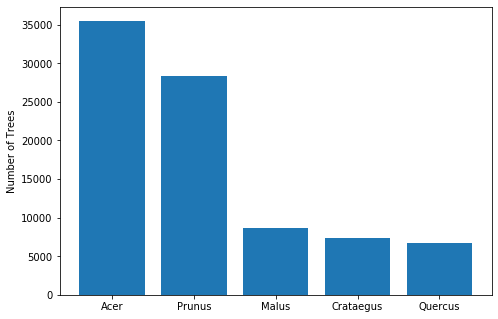

In [158]:
# Plot number of tree types
dict_to_hist(get_top_data(tree_counts), ylabel="Number of Trees")

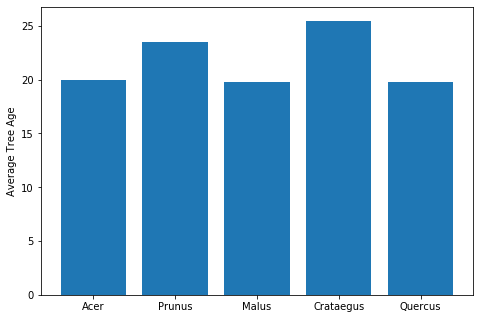

In [159]:
dict_to_hist(get_top_data(tree_ages), "Average Tree Age")

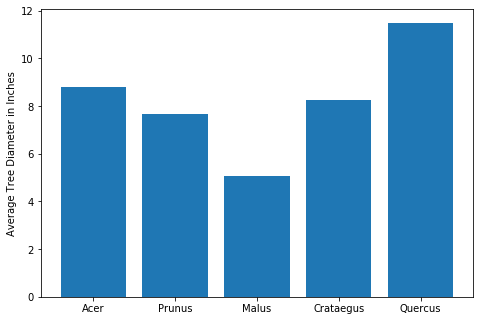

In [188]:
dict_to_hist(get_top_data(get_tree_ave(get_tree_data("DIAM"))), "Average Tree Diameter in Inches")

Gradient: 0.4217196717474061


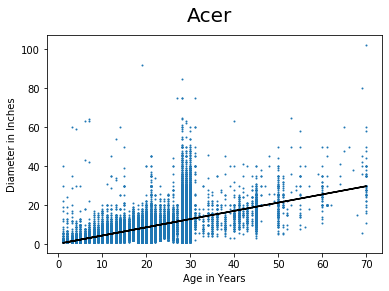

Gradient: 0.16652942918526822


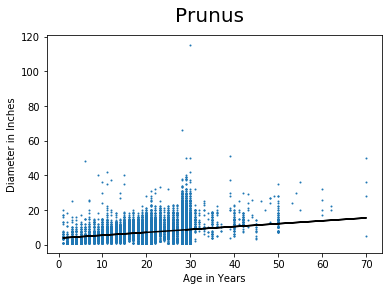

Gradient: 0.15873465810478937


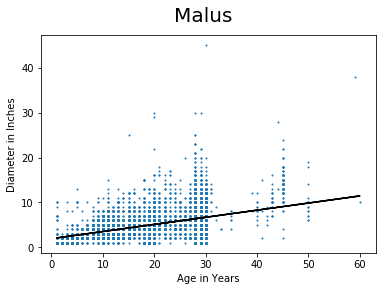

Gradient: 0.22302047907937986


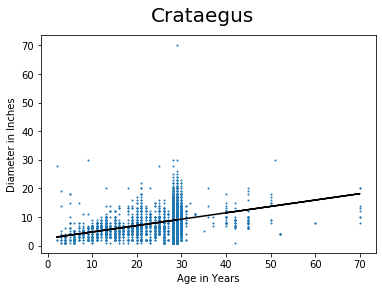

Gradient: 0.5476952280607703


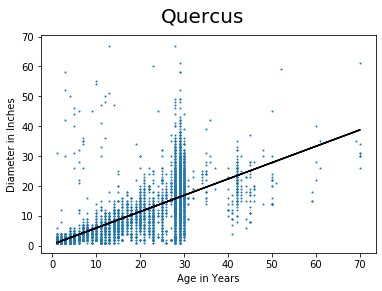

In [203]:
for t in top_tree_names:
    plot_stats("PLANTED_DA", "DIAM", xlabel="Age in Years", ylabel="Diameter in Inches", 
           xfunc=date_to_year, tree_type=t, point_size=1, plot_line=True, title=t)

In [177]:
print(sf.shapes()[0].__dict__)

{'shapeType': 1, 'points': [[-122.31772727624292, 47.63950219472465]], 'parts': []}
